In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.metrics

# Real world example: Digit Classification

We will now create a simple NN model to classify handwritten digits. We'll use the famous MNIST database which comes with the Keras library.

## Loading and exploring the dataset

In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [33]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

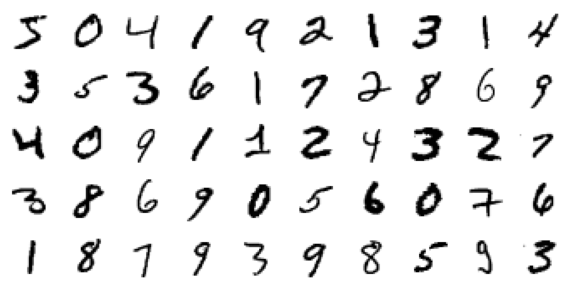

In [35]:
f, axes = plt.subplots(5, 10, figsize=(10, 5))
axes = axes.flatten()
for i in range(50):
    axes[i].imshow(x_train[i,:,:], cmap=plt.get_cmap('binary'))
    axes[i].axis('off')

In [36]:
print(np.min(x_train))
print(np.max(x_train))

0
255


In [37]:
x_train[0,:,:].flatten().shape

(784,)

## Simple Feed Forward Neural Network

We'll use a simple feed forward neural network classifier to predict the digit given the input pixels. The architecture of this network is as follows:

![alt text](figures/mnist_ff.jpg)

* Pixels in each input image will be flattened so that they form a vector of $28 \times 28 = 784$ numbers.
* Given this vector as input, the neural network will predict the associated digit.

### Normalizing Inputs

Neural networks train best when the magnitude of the inputs is small. But as you saw earlier, each pixel in the image takes values from 0 to 255, which is too big a range. Therefore, we must normalize the inputs. For this example, we'll rescale the pixel values so that they are between 0 and 1.

In [38]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

### Flattening the inputs

Now, we will flatten the inputs so that they become vectors of 784 numbers.

In [40]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

In [41]:
x_train.shape

(60000, 784)

### Categorizing the output

The classes in `y_train` and `y_test` are stored as numbers. We need to convert those to one-hot vectors as we did in multiclass classification.

In [45]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

### Training and Evaluation

In [127]:
# number of hidden units, try changing that
n_hidden1 = 100
n_hidden2 = 10

model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(x_train.shape[1],)),
        layers.Dense(n_hidden1, activation='relu'),
        #layers.Dropout(0.5),
        layers.Dense(n_hidden2, activation='relu'),
        #layers.Dropout(0.5),
        layers.Dense(y_train_onehot.shape[1], activation="softmax"),
    ]
)
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [128]:
# train the model
h = model.fit(x = x_train, y=y_train_onehot, verbose=True, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 1s 1ms/step - loss: 0.5425 - accuracy: 0.8426
Epoch 2/50
469/469 [==============================] - 1s 1ms/step - loss: 0.2046 - accuracy: 0.9430
Epoch 3/50
469/469 [==============================] - 1s 1ms/step - loss: 0.1499 - accuracy: 0.9584
Epoch 4/50
469/469 [==============================] - 1s 1ms/step - loss: 0.1189 - accuracy: 0.9658
Epoch 5/50
469/469 [==============================] - 1s 1ms/step - loss: 0.0975 - accuracy: 0.9717
Epoch 6/50
469/469 [==============================] - 1s 1ms/step - loss: 0.0825 - accuracy: 0.9759
Epoch 7/50
469/469 [==============================] - 1s 1ms/step - loss: 0.0706 - accuracy: 0.9793
Epoch 8/50
469/469 [==============================] - 1s 1ms/step - loss: 0.0613 - accuracy: 0.9818
Epoch 9/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0534 - accuracy: 0.9846
Epoch 10/50
469/469 [==============================] - 1s 2ms/step - loss: 0.0466 - accuracy: 0.9860

In [129]:
# test the model
ypred = model.predict(x_test, batch_size=x_test.shape[1]//10)

In [130]:
# convert probabilistic outputs into hard decisions by just taking the element with the largest probability
ypred_hard = np.argmax(ypred, axis=1)

In [131]:
# compute accuracy
sklearn.metrics.accuracy_score(y_test, ypred_hard)

0.9764

In [132]:
# compute confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, ypred_hard)
cm

array([[ 967,    0,    2,    0,    1,    1,    4,    1,    3,    1],
       [   0, 1122,    3,    1,    0,    0,    3,    0,    6,    0],
       [   5,    3, 1006,    4,    1,    0,    1,    5,    7,    0],
       [   0,    0,    2,  985,    0,    7,    1,    5,    5,    5],
       [   0,    1,    3,    1,  958,    0,    4,    3,    4,    8],
       [   2,    0,    0,   10,    1,  869,    2,    1,    6,    1],
       [   3,    2,    4,    1,    3,    7,  937,    0,    1,    0],
       [   2,    6,    7,    2,    3,    0,    0,  998,    4,    6],
       [   4,    0,    5,    5,    3,    3,    2,    5,  945,    2],
       [   2,    3,    1,    5,    5,    5,    0,    5,    6,  977]],
      dtype=int64)

In [136]:
W, b = model.layers[0].get_weights()
print(W.shape)
print(b.shape)

(784, 100)
(100,)


In [137]:
x_train[0,:].shape

(784,)

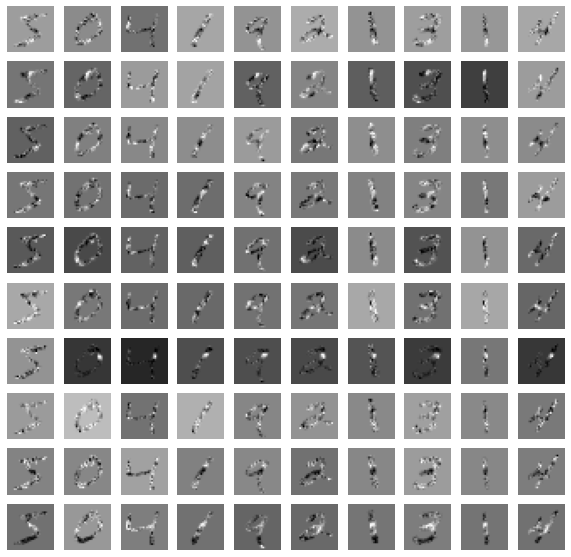

In [138]:
f, axes = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        x_sample = x_train[j,:]
        r = np.reshape(W[:,i]*x_sample, (28, 28))
        axes[i,j].imshow(r, cmap=plt.get_cmap('binary'))
        axes[i,j].axis('off')